In [1]:
import numpy as np

a1 = np.array([[1, 2, 3], [4, 5, 6]])
np.sum(a1, axis=0)

array([5, 7, 9])

In [2]:
import sys
sys.path.append('..')

In [3]:
from common.util import preprocess, create_co_matrix, cos_similarity, ppmi

In [4]:
text = """TARS is one of four former U.S. Marine Corps tactical robots along with PLEX, CASE and KIPP featured in the Interstellar universe. 
    He is one of the crew members of Endurance along with Cooper, Brand, Doyle, Romilly, and CASE."""
corpus, word_to_id, id_to_word = preprocess(text)
vocab_size = len(word_to_id)
C = create_co_matrix(corpus, vocab_size)
W = ppmi(C)

In [5]:
np.set_printoptions(precision=3)

In [6]:
print(C)

[[0 1 0 ... 0 0 0]
 [1 0 2 ... 0 0 0]
 [0 2 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 1 0 1]
 [0 0 0 ... 0 1 0]]


In [7]:
print(W)

[[0.    4.524 0.    ... 0.    0.    0.   ]
 [4.524 0.    3.524 ... 0.    0.    0.   ]
 [0.    3.524 0.    ... 0.    0.    0.   ]
 ...
 [0.    0.    0.    ... 0.    4.524 0.   ]
 [0.    0.    0.    ... 4.524 0.    4.524]
 [0.    0.    0.    ... 0.    4.524 0.   ]]


In [8]:
U, S, V = np.linalg.svd(W)

In [9]:
C[0]

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [10]:
W[0]

array([0.   , 4.524, 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ], dtype=float32)

In [11]:
U[0]

array([ 4.619e-02,  6.861e-02, -9.159e-05, -9.316e-04, -6.350e-02,
       -5.289e-03,  6.102e-02,  6.380e-02, -1.779e-01,  2.646e-01,
       -2.288e-01,  3.411e-01, -1.802e-02,  1.090e-01,  5.307e-02,
        1.093e-01,  9.154e-02, -7.770e-02,  3.215e-01,  1.025e-01,
        3.264e-02, -5.632e-02,  1.114e-01,  3.043e-02, -8.362e-02,
       -2.475e-01,  1.991e-03, -1.827e-02, -9.710e-02,  1.730e-01,
        3.884e-01,  4.782e-01, -2.150e-01,  6.634e-02], dtype=float32)

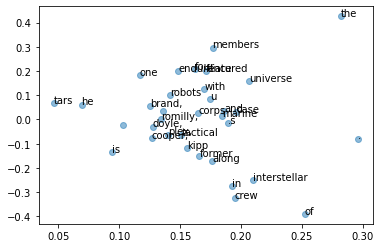

In [12]:
import matplotlib.pyplot as plt
for word, word_id in word_to_id.items():
    plt.annotate(word, (U[word_id, 0], U[word_id, 1]))
    
plt.scatter(U[:, 0], U[:, 1], alpha=0.5)
plt.show()

In [13]:
from show_ptb import *

말뭉치 크기: 929589
corpus[:30]: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29]

id_to_word[0]: aer
id_to_word[1]: banknote
id_to_word[2]: berlitz

word_to_id['car']: 3856
word_to_id['happy']: 4428
word_to_id['lexus']: 7426


In [14]:
from dataset import ptb

In [15]:
window_size = 2
wordvec_size = 100

corpus, word_to_id, id_to_word = ptb.load_data('train')
vocab_size = len(word_to_id)
C = create_co_matrix(corpus, vocab_size, window_size)
W = ppmi(C, verbose=True)

try:
    from sklearn.utils.extmath import randomized_svd
    U, S, V = randomized_svd(W, n_components=wordvec_size, n_iter=5, random_state=None)
except ImportError:
    U, S, V = np.linalg.svd(W)

1.0% 완료
2.0% 완료
3.0% 완료
4.0% 완료
5.0% 완료
6.0% 완료
7.0% 완료
8.0% 완료
9.0% 완료
10.0% 완료
11.0% 완료
12.0% 완료
13.0% 완료
14.0% 완료
15.0% 완료
16.0% 완료
17.0% 완료
18.0% 완료
19.0% 완료
20.0% 완료
21.0% 완료
22.0% 완료
23.0% 완료
24.0% 완료
25.0% 완료
26.0% 완료
27.0% 완료
28.0% 완료
29.0% 완료
30.0% 완료
31.0% 완료
32.0% 완료
33.0% 완료
34.0% 완료
35.0% 완료
36.0% 완료
37.0% 완료
38.0% 완료
39.0% 완료
40.0% 완료
41.0% 완료
42.0% 완료
43.0% 완료
44.0% 완료
45.0% 완료
46.0% 완료
47.0% 완료
48.0% 완료
49.0% 완료
50.0% 완료
51.0% 완료
52.0% 완료
53.0% 완료
54.0% 완료
55.0% 완료
56.0% 완료
57.0% 완료
58.0% 완료
59.0% 완료
60.0% 완료
61.0% 완료
62.0% 완료
63.0% 완료
64.0% 완료
65.0% 완료
66.0% 완료
67.0% 완료
68.0% 완료
69.0% 완료
70.0% 완료
71.0% 완료
72.0% 완료
73.0% 완료
74.0% 완료
75.0% 완료
76.0% 완료
77.0% 완료
78.0% 완료
79.0% 완료
80.0% 완료
81.0% 완료
82.0% 완료
83.0% 완료
84.0% 완료
85.0% 완료
86.0% 완료
87.0% 완료
88.0% 완료
89.0% 완료
90.0% 완료
91.0% 완료
92.0% 완료
93.0% 완료
94.0% 완료
95.0% 완료
96.0% 완료
97.0% 완료
98.0% 완료
99.0% 완료


In [18]:
word_vecs = U[:, :wordvec_size]

from common.util import most_similar

querys = ['you', 'year', 'car', 'apple']
for query in querys:
    most_similar(query, word_to_id, id_to_word, word_vecs, top=5)


[query] you
 i: 0.6702360510826111
 anybody: 0.6237749457359314
 we: 0.5775454640388489
 do: 0.5601609349250793
 someone: 0.5280604362487793

[query] year
 month: 0.6533989310264587
 earlier: 0.6450467109680176
 quarter: 0.638944149017334
 last: 0.6183250546455383
 next: 0.6128044724464417

[query] car
 auto: 0.6576130390167236
 luxury: 0.6391260027885437
 vehicle: 0.570425808429718
 corsica: 0.5555427074432373
 cars: 0.5136232376098633

[query] apple
 sun: 0.5118258595466614
 hewlett-packard: 0.498661607503891
 mci: 0.491909921169281
 cupertino: 0.4773806631565094
 microsystems: 0.45918363332748413
